# Visualizing Data in Python

#### Tables, Histograms, Boxplots

When working with a new dataset, one of the most useful ways to begin the analysis is to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be able to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook we demonstrate some basic visualisations in Python, building our abilities to explore data from a graphical perspective.  We will use the 'tips' dataset, whose observations contain information about restaurant bills and tipping.

In [84]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

Next we read the data from the filesytem and use it to construct a Pandas dataframe.

In [85]:
tips_data = sns.load_dataset("tips")

#### Visualizing the Data - Tables
When you begin working with a new data set,  it is often useful to inspect the first few rows of data. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we produce below. 

In [86]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Describing Data

Summary statistics, including the mean, minimum, and maximum of the data, can be useful to get a feel for the central tendency and dispersion of each variable. 

In [87]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creating a Histogram

A histogram captures the shape of the distribution of the data.

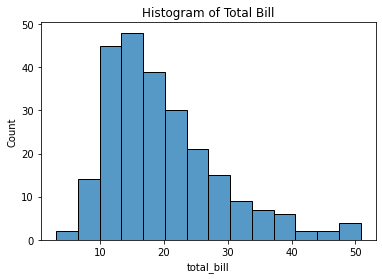

In [88]:
sns.histplot(tips_data["total_bill"], kde = False).set_title("Histogram of Total Bill");

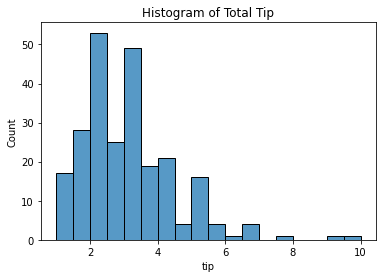

In [89]:
sns.histplot(tips_data["tip"], kde = False).set_title("Histogram of Total Tip");

The tips data are bivariate -- each customer has both a total bill value and a tip value.  This allows us to plot one of these variables against the other in a scatterplot.  It is natural to expect the tip to be larger when the total bill is larger.  This relationship is evident in the scatterplot below.

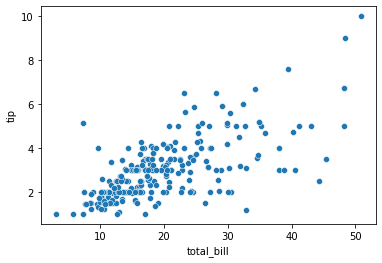

In [90]:
sns.scatterplot(x="total_bill", y="tip", data=tips_data);

We may wish to stratify our data according to some factor, such as the sex of the customer.  In this case, we would be able to see if there are systematic differences in tipping behavior or bill size between sexes.

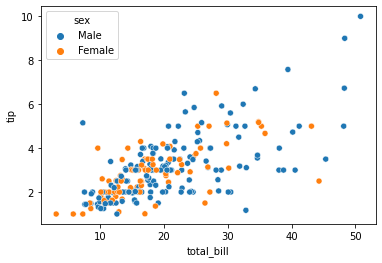

In [91]:
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=tips_data);

#### Creating a Boxplot

Histograms require a lot of data to produce accurate estimates of the population density (which is what the histogram is estimating).  Boxplots show a minimal amount of information about the shape of a distribution and can be more informative with smaller datasets.

Below we create a boxplot of the bill amount.  The median bill is around 18 dollars, and half of the bills fall between 12 and 24 dollars (approximately).  Extreme bills may be as large as 40 dollars, with a small number of bills being even larger than 40 dollars.

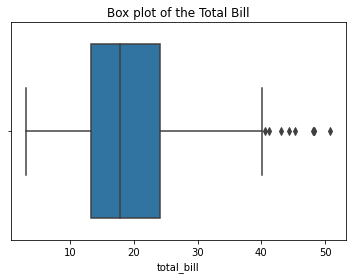

In [92]:
sns.boxplot(x=tips_data["total_bill"]).set_title("Box plot of the Total Bill");

Next we create a boxplot of the tip amounts.

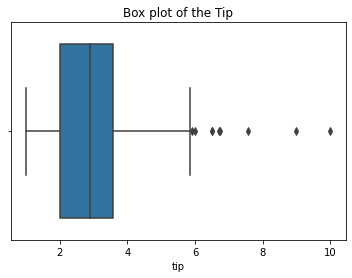

In [93]:
sns.boxplot(x=tips_data["tip"]).set_title("Box plot of the Tip")
plt.show()

#### Creating histograms and boxplots stratified by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in coordination with another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, or if tipping varies according to the time of the day.

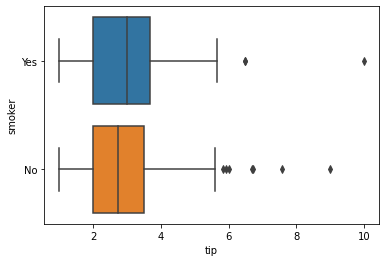

In [94]:
# Create a boxplot and histogram of the tips grouped by smoking status
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])
plt.show()

<AxesSubplot:xlabel='tip', ylabel='time'>

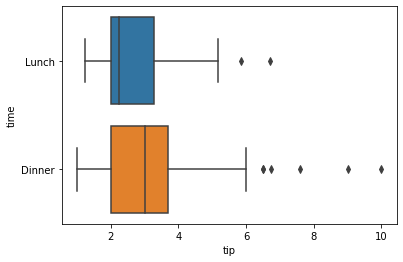

In [95]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])

We can also compare the tip distributions based on whether the tip was paid for lunch or dinner.

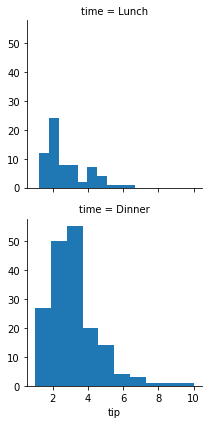

In [96]:
g = sns.FacetGrid(tips_data, row = "time")
g = g.map(plt.hist, "tip")
plt.show()

Next we look at the distribution of tips by day of week, using boxplots to show the main features of the distributions.

<AxesSubplot:xlabel='tip', ylabel='day'>

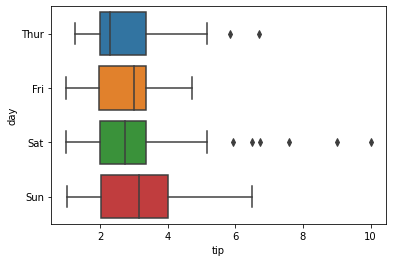

In [97]:
sns.boxplot(x = tips_data["tip"], y = tips_data["day"])

Histograms can capture more features of a distribution, but if the sample is small a histogram may be quite imprecise.

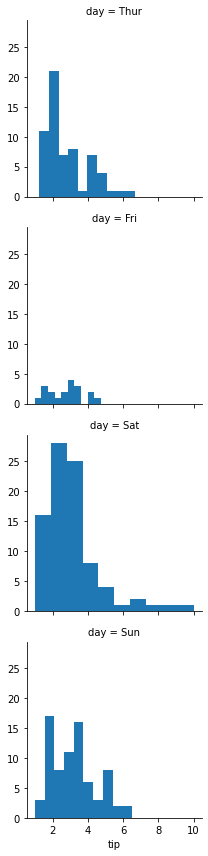

In [98]:
g = sns.FacetGrid(tips_data, row = "day")
g = g.map(plt.hist, "tip")
plt.show()